In [3]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.max_rows = 100
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

!pip install category_encoders
import category_encoders as ce

In [4]:
# Importing dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Dropping the following columns because this is the data collected by the sales team after contacting potential leads.
leads = leads.drop(["Tags", "Lead Profile", "Lead Quality","Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score"],axis = 1)

# Setting "Lead Number as the index"
leads = leads.set_index("Lead Number")

In [6]:
leads.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000


In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 29 columns):
Prospect ID                                      9240 non-null object
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 non-null object
How did you hear about X Education            

In [8]:
# Checking the percentage of null values column wise
round(leads.isnull().mean().sort_values(ascending = False)*100,2)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Magazine  

In [9]:
# Checking the percentage of null values row wise
round(100*(leads.isnull().sum(axis=1)/len(leads.index)), 2)

Lead Number
660737    0.01
660728    0.00
660727    0.00
660719    0.00
660681    0.00
660680    0.06
660673    0.00
660664    0.06
660624    0.03
660616    0.02
660608    0.00
660570    0.00
660562    0.00
660558    0.00
660553    0.00
660547    0.00
660540    0.06
660534    0.00
660522    0.00
660509    0.00
660479    0.00
660478    0.00
660471    0.00
660461    0.00
660458    0.00
660447    0.00
660432    0.00
660424    0.00
660423    0.00
660410    0.00
660402    0.00
660374    0.00
660361    0.00
660339    0.05
660333    0.00
660321    0.00
660312    0.00
660267    0.00
660255    0.00
660236    0.00
660235    0.00
660222    0.00
660215    0.00
660203    0.02
660194    0.00
660180    0.00
660174    0.00
660153    0.06
660149    0.00
660128    0.06
          ... 
579941    0.00
579930    0.00
579928    0.00
579926    0.01
579925    0.00
579920    0.00
579918    0.00
579906    0.00
579900    0.00
579892    0.01
579890    0.00
579889    0.02
579885    0.00
579884    0.00
579883    0.0

### Investigating categorical variables

In [10]:
leads.select_dtypes(include = "O").head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,Select,Select,Unemployed,...,No,No,No,No,No,No,Select,No,No,Modified
660728,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,...,No,No,No,No,No,No,Select,No,No,Email Opened
660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Select,Student,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,...,No,No,No,No,No,No,Mumbai,No,No,Modified
660681,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,Select,Other,Unemployed,...,No,No,No,No,No,No,Mumbai,No,No,Modified


In [11]:
# Replacing "Select" with NaN
leads = leads.replace("Select",np.NaN)

In [12]:
leads.select_dtypes(include = "O").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 25 columns):
Prospect ID                                      9240 non-null object
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 non-null object
How did you hear about X Education               1990 non-null object
What is your current occupation                  6550 non-null object
What matters most to you in choosing a course    6531 non-null object
Search                                           9240 non-null object
Magazine                                      

In [13]:
leads.select_dtypes(include = "O").describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,5860,1990,6550,...,9240,9240,9240,9240,9240,9240,5571,9240,9240,9240
unique,9240,5,21,2,2,17,38,18,9,6,...,2,2,2,1,1,1,6,1,2,16
top,a4710cf2-6656-472e-bf12-b95e24d7d567,Landing Page Submission,Google,No,No,Email Opened,India,Finance Management,Online Search,Unemployed,...,No,No,No,No,No,No,Mumbai,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,976,808,5600,...,9239,9236,9233,9240,9240,9240,3222,9240,6352,3407


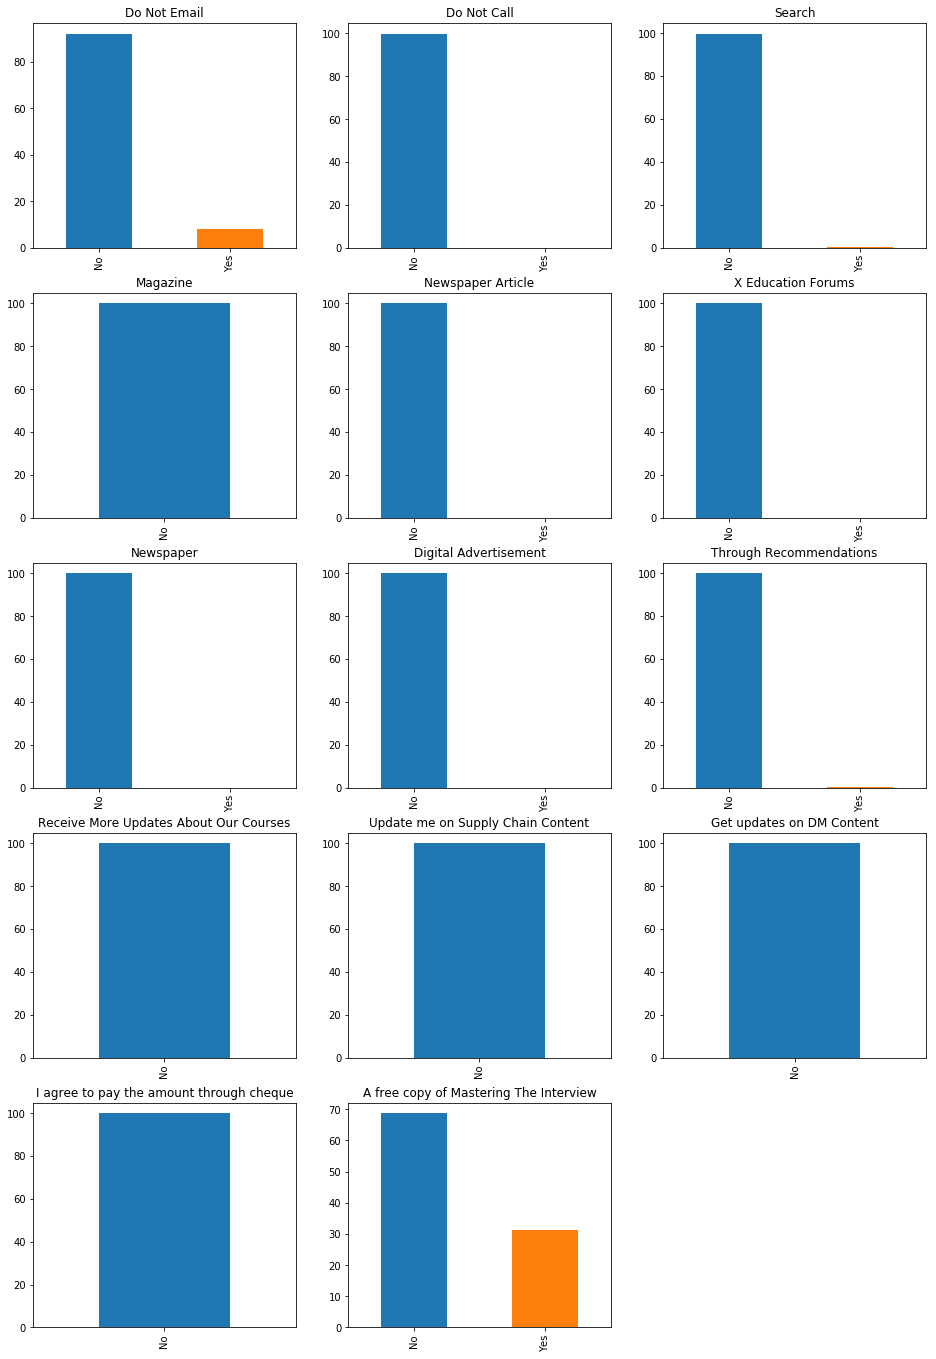

In [14]:
# Analysing Binary Variables

binary_var =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 
            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content',
            'I agree to pay the amount through cheque','A free copy of Mastering The Interview']
plt.figure(figsize=(16,24))
for i in enumerate(binary_var):
    plt.subplot(5,3,i[0]+1)
    round(leads[i[1]].value_counts(dropna=False,normalize=True)*100,2).plot(kind = "bar", title =i[1])

In [15]:
#From above plot we can see that all binary variables except 'A free copy of Mastering The Interview' & 'Do Not Email' 
# are higly skewed and can be dropped
binary_var_to_drop =  ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 
            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content',
            'I agree to pay the amount through cheque']
leads.drop(binary_var_to_drop, axis = 1,inplace=True)

In [16]:
# Checking for null percentage
round(leads.select_dtypes(include = "O").isnull().mean().sort_values(ascending = False)*100,2)

How did you hear about X Education               78.46
City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Do Not Email                                      0.00
Lead Origin                                       0.00
Prospect ID                                       0.00
dtype: float64

In [17]:
# Dropping "How did you hear about X Education" as it has 78.46% missing values
leads = leads.drop("How did you hear about X Education", axis = 1)

In [18]:
# Replacing null values with "NA" (Not Available) in variables with null values more than 15%
fillna_list = ["City", "Specialization", "Country", "What is your current occupation", "What matters most to you in choosing a course"]
leads[fillna_list] = leads[fillna_list].fillna("NA")

In [19]:
# Replacing null values with the variable's mode value in variables with null values less than 1.5%
leads["Last Activity"] = leads["Last Activity"].fillna(leads["Last Activity"].mode()[0])
leads["Lead Source"] = leads["Lead Source"].fillna(leads["Lead Source"].mode()[0])

In [20]:
# Checking for null percentage
round(leads.select_dtypes(include = "O").isnull().mean().sort_values(ascending = False)*100,2)

Last Notable Activity                            0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Do Not Email                                     0.0
Lead Source                                      0.0
Lead Origin                                      0.0
Prospect ID                                      0.0
dtype: float64

### Categorising less frequent values in Categorical Variables as "All Others"

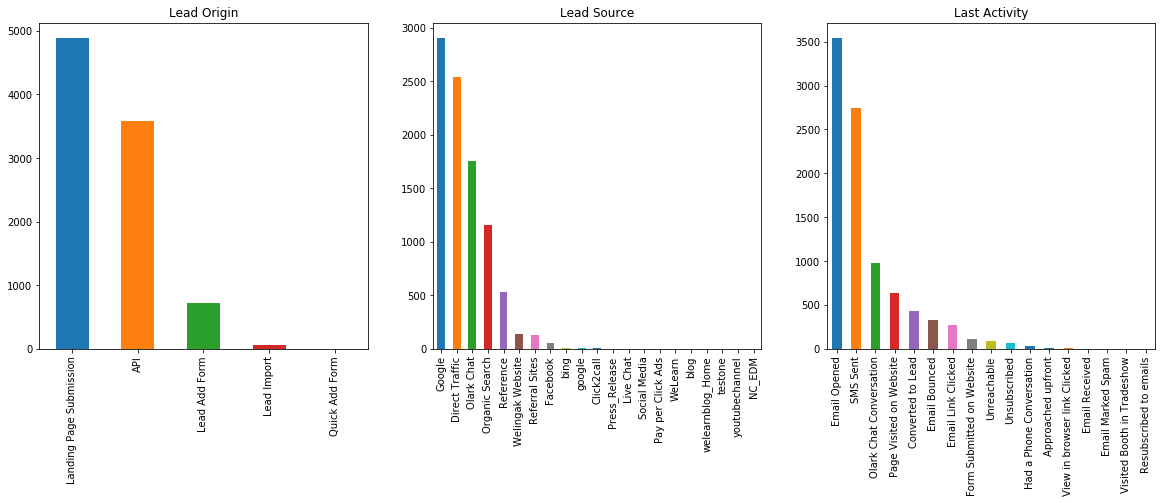

In [21]:
# Plotting value counts for each categorical variable
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
leads["Lead Origin"].value_counts().plot(kind = "bar", title = "Lead Origin")
plt.subplot(1,3,2)
leads["Lead Source"].value_counts().plot(kind = "bar", title = "Lead Source")
plt.subplot(1,3,3)
leads["Last Activity"].value_counts().plot(kind = "bar", title = "Last Activity")

In [22]:
# Categorising less frequent values in "Lead Origin" as "All Others"
leads.loc[~(leads["Lead Origin"].isin(["Landing Page Submission", "API", "Lead Add Form"])) , "Lead Origin"] = "All Others"

# Categorising less frequent values in "Lead Source" as "All Others"
leads.loc[~(leads["Lead Source"].isin(["Google", "Direct Traffic", "Olark Chat", "Organic Search", "Reference"])) , "Lead Source"] = "All Others"

# Categorising less frequent values in "Last Activity" as "All Others"
leads.loc[~(leads["Last Activity"].isin(["Email Opened", "SMS Sent", "Olark Chat Conversation", "Page Visited on Website", "Converted to Lead", "Email Bounced", "Email Link Clicked"])) , "Last Activity"] = "All Others"

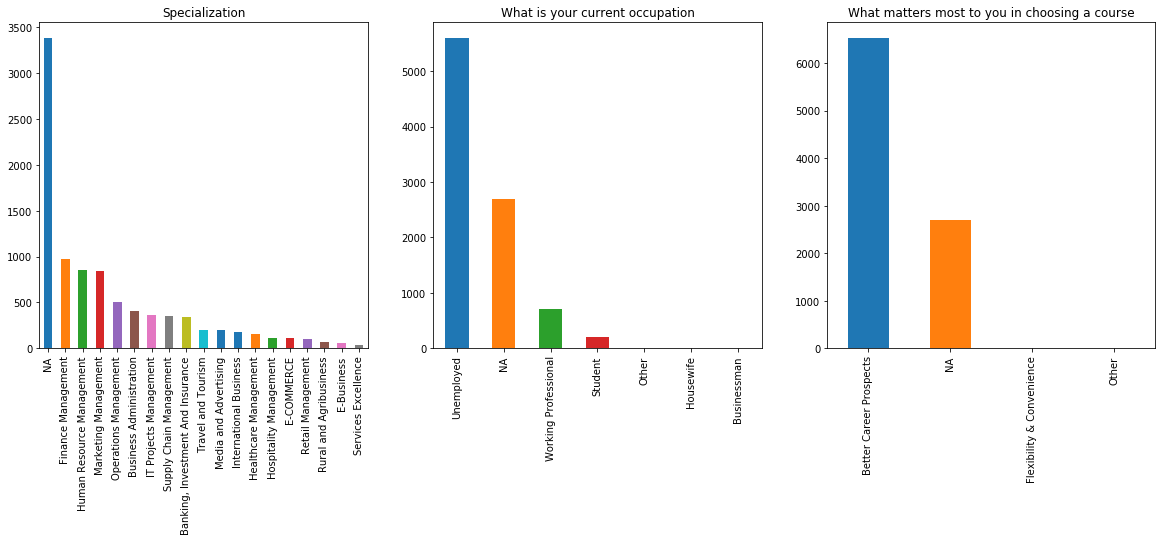

In [23]:
# Plotting value counts for each categorical variable
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
leads["Specialization"].value_counts().plot(kind = "bar", title = "Specialization")
plt.subplot(1,3,2)
leads["What is your current occupation"].value_counts().plot(kind = "bar", title = "What is your current occupation")
plt.subplot(1,3,3)
leads["What matters most to you in choosing a course"].value_counts().plot(kind = "bar", title = "What matters most to you in choosing a course")

In [24]:
# Categorising less frequent values in "Specialization" as "All Others"
leads.loc[~(leads["Specialization"].isin(["Select", "NA", "Finance Management", "Human Resource Management", "Marketing Management","Operations Management","Business Administration","IT Projects Management","Supply Chain Management","Banking, Investment And Insurance"])) , "Specialization"] = "All Others"

# Categorising less frequent values in "What is your current occupation" as "All Others"
leads.loc[~(leads["What is your current occupation"].isin(["Unemployed", "NA", "Working Professional"])) , "What is your current occupation"] = "All Others"

# Categorising less frequent values in "What matters most to you in choosing a course" as "NA"
leads.loc[~(leads["What matters most to you in choosing a course"].isin(["Better Career Prospects", "NA"])) , "What matters most to you in choosing a course"] = "NA"

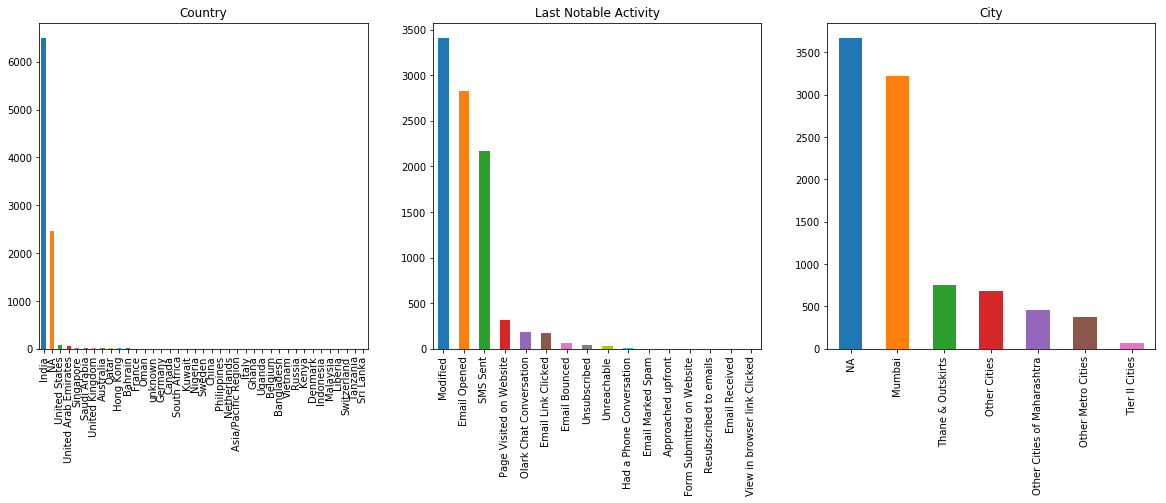

In [25]:
# Plotting value counts for each categorical variable
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
leads["Country"].value_counts().plot(kind = "bar", title = "Country")
plt.subplot(1,3,2)
leads["Last Notable Activity"].value_counts().plot(kind = "bar", title = "Last Notable Activity")
plt.subplot(1,3,3)
leads["City"].value_counts().plot(kind = "bar", title = "City")

In [26]:
# Categorising less frequent values in "Country" as "All Others"
leads.loc[~(leads["Country"].isin(["India", "NA"])) , "Country"] = "All Others"

# Categorising less frequent values in "Last Notable Activity" as "All Others"
leads.loc[~(leads["Last Notable Activity"].isin(["Modified", "Email Opened", "SMS Sent","Page Visited on Website"])) , "Last Notable Activity"] = "All Others"

## Bivariate Analysis
### Checking the proportion of the target variable ("Converted") for each categorical variable

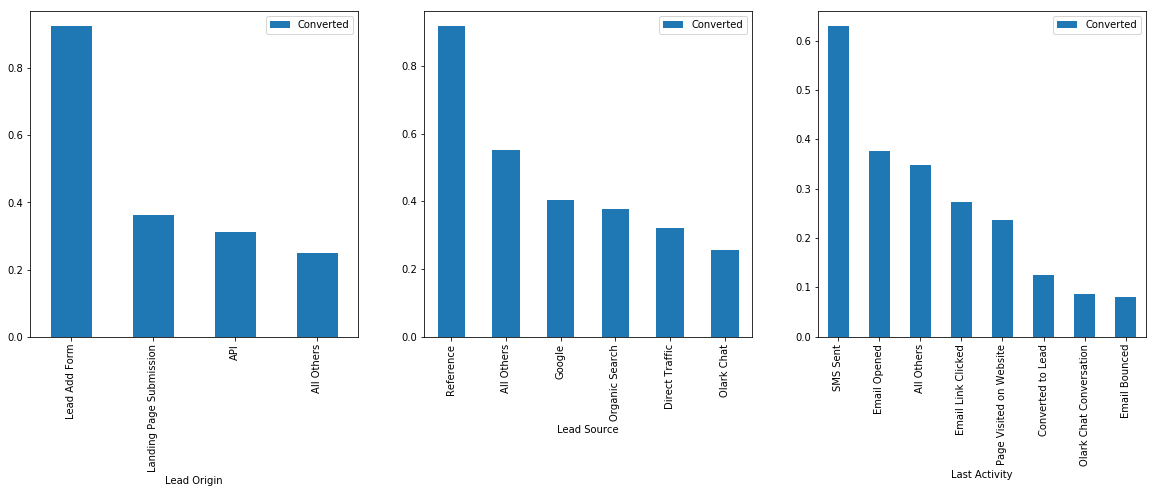

In [27]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,3,1)
leads.groupby("Lead Origin").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax1)
ax2 = plt.subplot(1,3,2)
leads.groupby("Lead Source").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax2)
ax3 = plt.subplot(1,3,3)
leads.groupby("Last Activity").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax3)

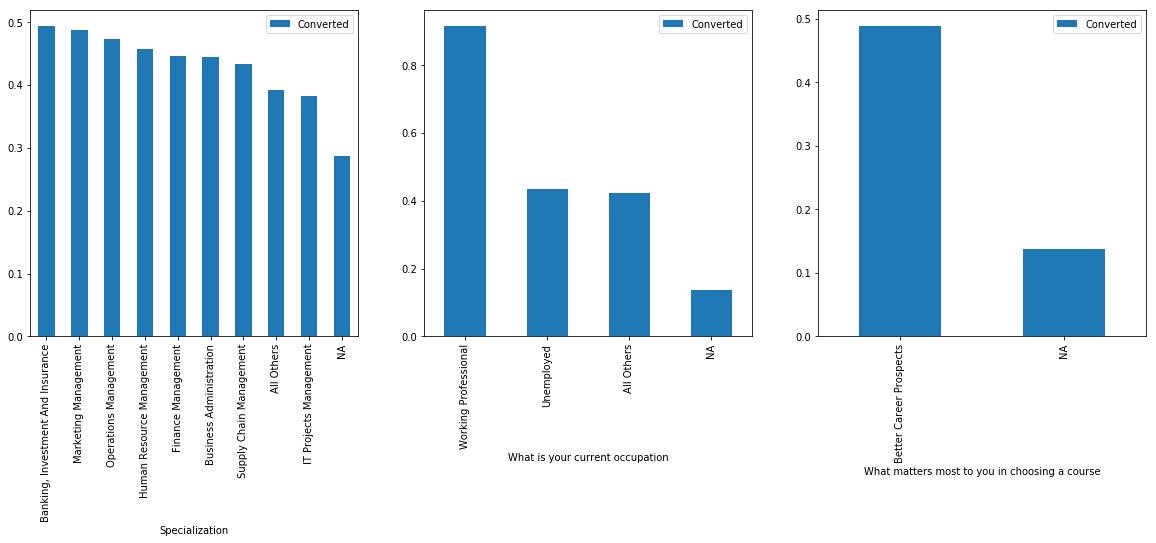

In [28]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,3,1)
leads.groupby("Specialization").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax1)
ax2 = plt.subplot(1,3,2)
leads.groupby("What is your current occupation").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax2)
ax3 = plt.subplot(1,3,3)
leads.groupby("What matters most to you in choosing a course").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax3)

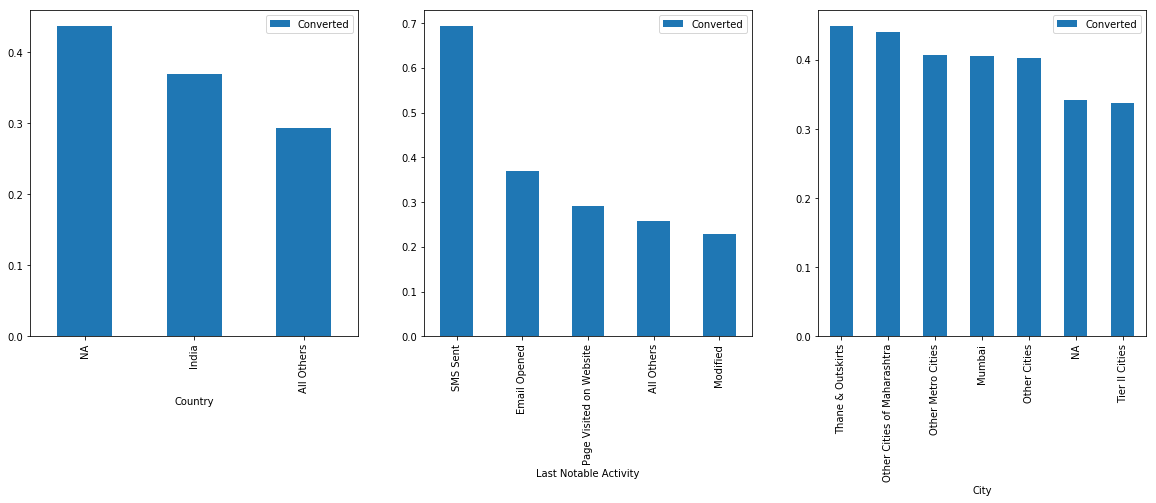

In [29]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,3,1)
leads.groupby("Country").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax1)
ax2 = plt.subplot(1,3,2)
leads.groupby("Last Notable Activity").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax2)
ax3 = plt.subplot(1,3,3)
leads.groupby("City").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax3)

### Investigating numeric variables


In [30]:
leads.select_dtypes(exclude = "O").head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,,,,
660737,0,0.0,0,0.0
660728,0,5.0,674,2.5
660727,1,2.0,1532,2.0
660719,0,1.0,305,1.0
660681,1,2.0,1428,1.0


In [31]:
leads.select_dtypes(exclude = "O").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 4 columns):
Converted                      9240 non-null int64
TotalVisits                    9103 non-null float64
Total Time Spent on Website    9240 non-null int64
Page Views Per Visit           9103 non-null float64
dtypes: float64(2), int64(2)
memory usage: 360.9 KB


In [32]:
leads.select_dtypes(exclude = "O").describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [33]:
round(leads.select_dtypes(exclude = "O").isnull().mean().sort_values(ascending = False)*100,2)

Page Views Per Visit           1.48
TotalVisits                    1.48
Total Time Spent on Website    0.00
Converted                      0.00
dtype: float64

In [34]:
# Replacing null values with the column average in columns with around 1% null values
leads["TotalVisits"] = leads["TotalVisits"].fillna(leads["TotalVisits"].mean())
leads["Page Views Per Visit"] = leads["Page Views Per Visit"].fillna(leads["Page Views Per Visit"].mean())

In [35]:
leads.select_dtypes(exclude = "O").nunique().sort_values()

Converted                         2
TotalVisits                      42
Page Views Per Visit            115
Total Time Spent on Website    1731
dtype: int64

In [36]:
# Adding 'Prospect ID' and 'Lead Number' to cols_to_drop
cols_to_drop = ["Prospect ID"]

In [37]:
# Dropping columns added to cols_to_drop 
leads1 = leads.drop(cols_to_drop, axis = 1)

In [38]:
leads1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NA,NA,Unemployed,Better Career Prospects,NA,No,Modified
660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,NA,Unemployed,Better Career Prospects,NA,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,All Others,Better Career Prospects,Mumbai,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,All Others,India,All Others,Unemployed,Better Career Prospects,Mumbai,No,Modified
660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,NA,Unemployed,Better Career Prospects,Mumbai,No,Modified


[Text(0, 0.5, ''), Text(0.5, 1.0, 'A free copy of Mastering The Interview')]

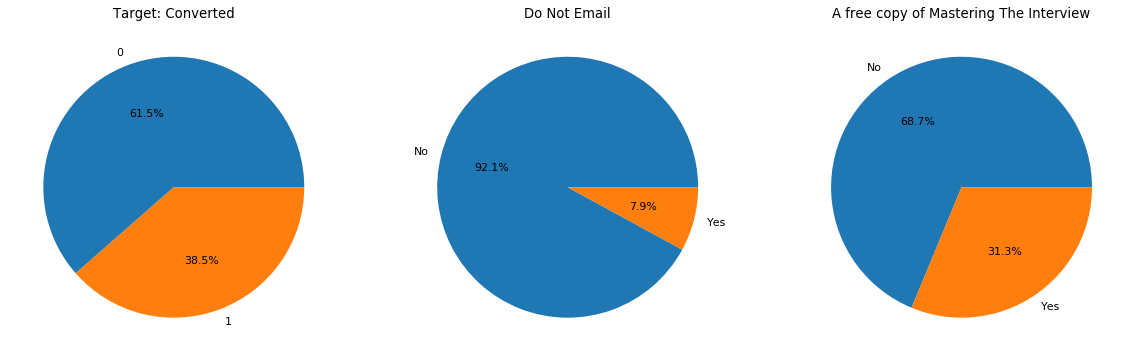

In [39]:
# Plotting pie chart to show the proportion of binary variables
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.rcParams.update({'font.size': 11})
cx = leads1["Converted"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
cx.set(title = "Target: Converted", ylabel = "")
plt.subplot(1,3,2)
ax = leads1["Do Not Email"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
ax.set(title = "Do Not Email", ylabel = "")
plt.subplot(1,3,3)
bx = leads1["A free copy of Mastering The Interview"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
bx.set(title = "A free copy of Mastering The Interview", ylabel = "")

In [40]:
leads1.select_dtypes(exclude = "O").describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000


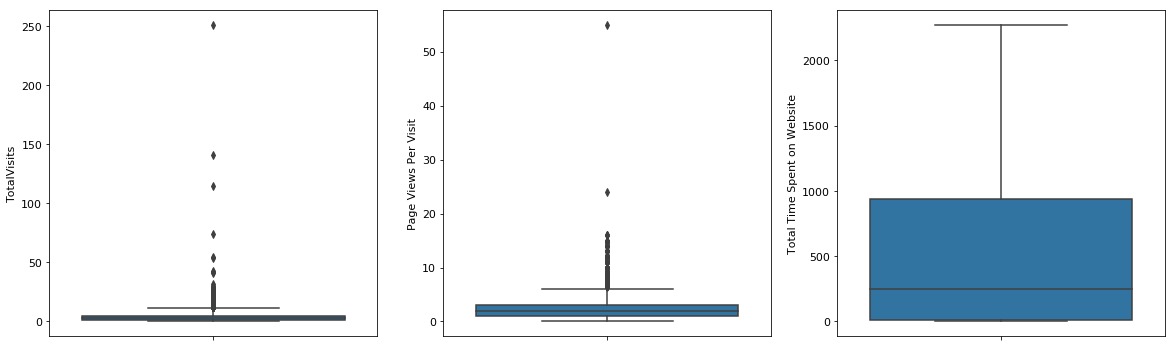

In [41]:
# Visualising numeric variables and checking for outliers
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot( y = "TotalVisits", data = leads1)
plt.subplot(1,3,2)
sns.boxplot( y = "Page Views Per Visit", data = leads1)
plt.subplot(1,3,3)
sns.boxplot( y = "Total Time Spent on Website", data = leads1)

In [42]:
# Capping outliers above the upper whisker in "TotalVisits" and "Page Views Per Visit"
clip_cols = ["TotalVisits","Page Views Per Visit"]
leads1[clip_cols] = leads1[clip_cols].clip(upper = leads1[clip_cols].quantile(0.99),axis =1 )

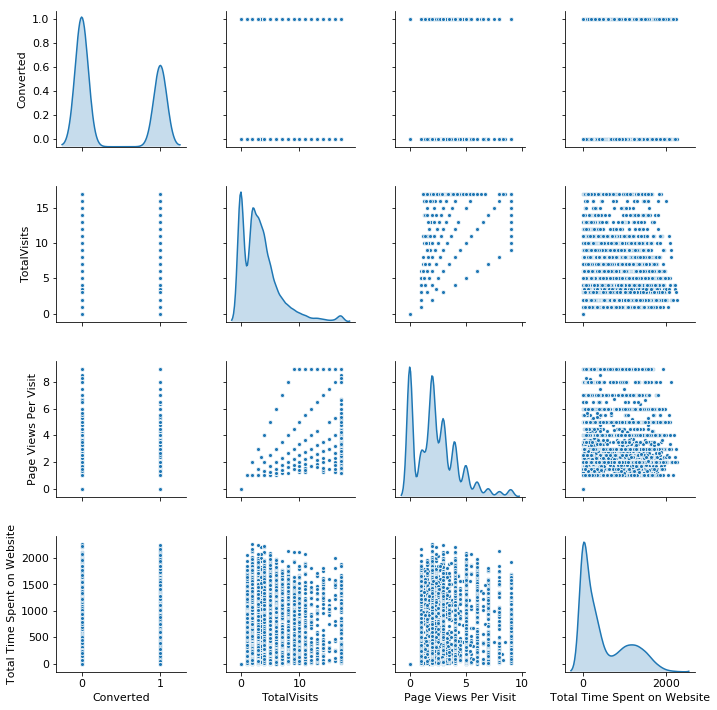

In [43]:
# Plotting pairplots to check correlations between numeric varibales
sns.pairplot(leads1[["Converted","Do Not Email","A free copy of Mastering The Interview","TotalVisits","Page Views Per Visit","Total Time Spent on Website"]], plot_kws={"s": 15}, diag_kind='kde')

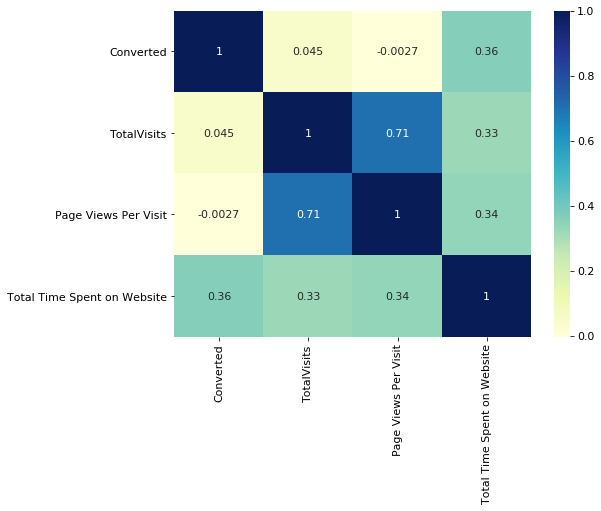

In [44]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (8,6))
sns.heatmap(leads1[["Converted","Do Not Email","A free copy of Mastering The Interview","TotalVisits","Page Views Per Visit","Total Time Spent on Website"]].corr(), annot = True, cmap="YlGnBu")
plt.show()

There are no highly correlated variables in this dataset

To handle categorical variables in the model we can use WOE encoding or Dummy encoding, the TA confirmed that either one should be okay.

### Using the WOE (Weight of Evidence) Approach for Categorical variables

In [45]:
# Putting feature variables in X
X = leads1.drop(["Converted"], axis=1)

# Putting response variable in y
y = leads1["Converted"]

In [46]:
# Encoding the categorical variables using WOE
woe_encoder = ce.WOEEncoder(cols = X.select_dtypes(include = "O").columns)
leads_woe = woe_encoder.fit_transform(X,y)
leads_woe.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,
660737,-0.326322,-0.602707,0.081001,0.0,0,0.0,-0.704000,0.214282,-0.444391,0.208770,0.421187,-0.184823,0.054760,-0.741903
660728,-0.326322,-0.031404,0.081001,5.0,674,2.5,-0.036178,-0.066208,-0.444391,0.208770,0.421187,-0.184823,0.054760,-0.068317
660727,-0.100574,-0.278953,0.081001,2.0,1532,2.0,-0.036178,-0.066208,0.243381,0.155088,0.421187,0.087356,-0.122985,-0.068317
660719,-0.100574,-0.278953,0.081001,1.0,305,1.0,-0.153195,-0.066208,0.026015,0.208770,0.421187,0.087356,0.054760,-0.741903
660681,-0.100574,0.081950,0.081001,2.0,1428,1.0,-1.453068,-0.066208,-0.444391,0.208770,0.421187,0.087356,0.054760,-0.741903


In [47]:
# Checking highly correlated variables (above 0.8) 
corr = abs(leads_woe.corr()).stack().reset_index().sort_values(0, ascending = False)
corr.columns = ["col1","col2","correlation"]
corr[(corr.col1 != corr.col2) & (corr.correlation > 0.8)]

,col1,col2,correlation
14,Lead Source,Lead Origin,0.856303
1,Lead Origin,Lead Source,0.856303


In [48]:
# Dropping "Lead Origin" as it is highly correlated with "Lead Source"
leads_woe = leads_woe.drop(["Lead Origin"], axis = 1)

In [49]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = leads_woe.columns
vif['VIF'] = [variance_inflation_factor(leads_woe.values, i) for i in range(leads_woe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Page Views Per Visit,4.49
2,TotalVisits,4.17
8,What is your current occupation,2.72
9,What matters most to you in choosing a course,2.53
7,Specialization,2.48
10,City,2.41
5,Last Activity,2.26
12,Last Notable Activity,2.09
3,Total Time Spent on Website,1.93
6,Country,1.54


The highest VIF is 4.64 for "Page Views Per Visit". Typically it is better to have VIF below 10

In [50]:
# Dropping "Lead Origin" as it is highly correlated with "Lead Source"
leads2 = leads1.drop(["Lead Origin"], axis = 1)

# Putting feature variables in X
X = leads2.drop(["Converted"], axis=1)
# Putting response variable in y
y = leads2["Converted"]

# Splitting X into and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=1)

# Encoding the categorical variables using WOE
woe_encoder = ce.WOEEncoder(cols = X_train.select_dtypes(include = "O").columns)
X_train = woe_encoder.fit_transform(X_train,y_train)

In [51]:
# Columns for scaling
col_names_to_scale = ['City', 'Country', 'Last Activity', 'Last Notable Activity', 'Lead Source',
       'Page Views Per Visit', 'Specialization', 'Total Time Spent on Website',
       'TotalVisits', 'What is your current occupation',
       'What matters most to you in choosing a course']

# Scaling X_train
scaler = StandardScaler()
X_train[col_names_to_scale] = scaler.fit_transform(X_train[col_names_to_scale])

In [52]:
# Logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()).fit()
logm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6916
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2858.6
Date:                Sun, 13 Sep 2020   Deviance:                       5717.2
Time:                        20:23:56   Pearson chi2:                 7.37e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6918      0.037    -18.680      0.000      -0.764      -0.619
Lead Source                                       0.4688      0.044     10.769      0.000       0.383       0.554
Do Not Email                                      0.6104      0.132      4.621      0.000       0.352       0.869
TotalVisits                                       0.2746      0.046      5.998      0.000       0.185       0.364
Total Time Spent on Website                       1.0463      0.039     27.056      0.000       0.971       1.122
Page Views Per Visit                             -0.3730      0.051     -7.351      0.000      -0.472      -0.274
Last Activity                                     0.6628      0.057     11.727      0.000       0.552       0.774
Country                                           0.6674      0.051     13.013      0.000       0.567       0.768
Specialization                                    0.1278      0.052      2.441      0.015       0.025       0.230
What is your current occupation                   0.9549      0.072     13.307      0.000       0.814       1.096
What matters most to you in choosing a course    -0.0701      0.061     -1.148      0.251      -0.190       0.050
City                                              0.0081      0.051      0.159      0.874      -0.092       0.108
A free copy of Mastering The Interview            1.1334      0.569      1.990      0.047       0.017       2.250
Last Notable Activity                             0.3287      0.047      7.044      0.000       0.237       0.420
=================================================================================================================
"""

In [53]:
# Dropping variables with high p-values
leads2 = leads2.drop(["What matters most to you in choosing a course", "City"],axis = 1)

In [54]:
# Putting feature variables in X
X = leads2.drop(["Converted"], axis=1)
# Putting response variable in y
y = leads2["Converted"]

# Splitting X into and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=1)

# Encoding the categorical variables using WOE
woe_encoder = ce.WOEEncoder(cols = X_train.select_dtypes(include = "O").columns)
X_train = woe_encoder.fit_transform(X_train,y_train)

In [55]:
# Columns for scaling
col_names_to_scale = [ 'Country', 'Last Activity', 'Last Notable Activity', 'Lead Source',
       'Page Views Per Visit', 'Specialization', 'Total Time Spent on Website',
       'TotalVisits', 'What is your current occupation']

# Scaling X_train
scaler = StandardScaler()
X_train[col_names_to_scale] = scaler.fit_transform(X_train[col_names_to_scale])

In [56]:
# Final Logistic Regression Model
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()).fit()
logm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6918
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.3
Date:                Sun, 13 Sep 2020   Deviance:                       5718.5
Time:                        20:23:57   Pearson chi2:                 7.27e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.7044      0.035    -19.984      0.000      -0.773      -0.635
Lead Source                                0.4657      0.043     10.776      0.000       0.381       0.550
Do Not Email                               0.6084      0.132      4.608      0.000       0.350       0.867
TotalVisits                                0.2740      0.046      5.990      0.000       0.184       0.364
Total Time Spent on Website                1.0472      0.039     27.070      0.000       0.971       1.123
Page Views Per Visit                      -0.3726      0.051     -7.358      0.000      -0.472      -0.273
Last Activity                              0.6643      0.057     11.756      0.000       0.554       0.775
Country                                    0.6645      0.051     13.016      0.000       0.564       0.765
Specialization                             0.1321      0.042      3.176      0.001       0.051       0.214
What is your current occupation            0.8922      0.045     19.926      0.000       0.804       0.980
A free copy of Mastering The Interview     1.1437      0.562      2.035      0.042       0.042       2.245
Last Notable Activity                      0.3249      0.047      6.979      0.000       0.234       0.416
==========================================================================================================
"""

In [87]:
y_train_pred = logm.predict(sm.add_constant(X_train)).values.reshape(-1)

In [58]:
print("ROC AUC of the Train Data:",round(roc_auc_score(y_train, y_train_pred),3))

ROC AUC of the Train Data: 0.886


In [59]:
# Encoding the categorical variables using WOE in test set
X_test = woe_encoder.transform(X_test)

# Scaling X_test
X_test[col_names_to_scale] =  scaler.transform(X_test[col_names_to_scale])
X_test
y_test_pred = logm.predict(sm.add_constant(X_test)).values.reshape(-1)
print("ROC AUC of the Test Data:",round(roc_auc_score(y_test,y_test_pred),3))

ROC AUC of the Test Data: 0.892


### Plotting the ROC Curve


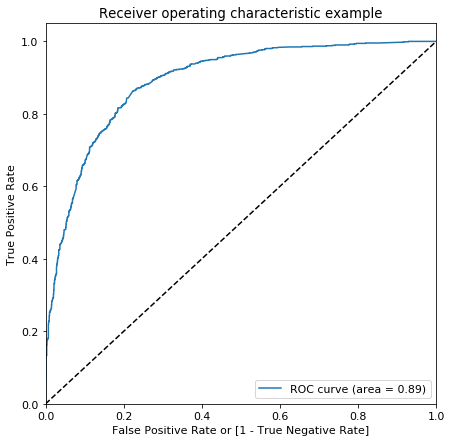

In [60]:
def draw_roc( actual, probs ):
    from sklearn import metrics
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


draw_roc(y_test, y_test_pred)

## Model Evaluation for Train data

### Finding Optimal Cutoff Point



In [61]:
# Creating a new data frame y_train_pred to find optimal cut-off

y_train_pred_final = pd.DataFrame(y_train.values, columns=['actuals'], index=y_train.index)
y_train_pred_final['pred_prob'] = y_train_pred

# Let's create columns with different probability cutoffs 
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.pred_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,actuals,pred_prob,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
Lead Number,,,,,,,,,,,,,,,,,,,,,
600406,1,0.930040,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
648236,1,0.797202,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
601512,0,0.836781,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
642361,1,0.981576,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
606502,1,0.710904,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0


In [62]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.actuals, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df

,prob,accuracy,sensi,speci
0.00,0.00,0.381674,1.000000,0.000000
0.05,0.05,0.522511,0.990926,0.233372
0.10,0.10,0.637662,0.966352,0.434772
0.15,0.15,0.704762,0.945558,0.556126
0.20,0.20,0.748918,0.919849,0.643407
0.25,0.25,0.772583,0.896786,0.695916
0.30,0.30,0.792208,0.871456,0.743291
0.35,0.35,0.803030,0.812098,0.797433
0.40,0.40,0.808514,0.776181,0.828471
0.45,0.45,0.813853,0.743667,0.857176


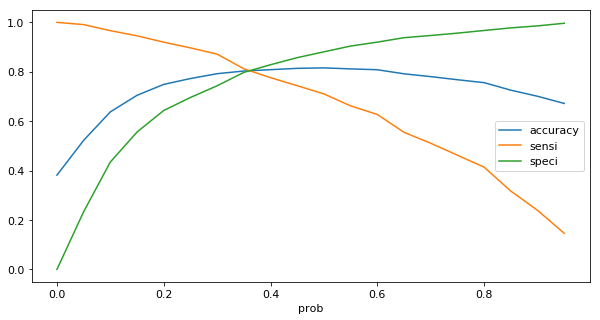

In [63]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot(kind = "line", x='prob', y=['accuracy','sensi','speci'], figsize=(10,5))
plt.show()

In [64]:
# From the above graph, we see that the optimal cut-off is at 0.35
y_train_pred_final['optimum_predictions'] = y_train_pred_final[0.35]
# In order to obtain a high conversion rate (80% or more) the minimum cut-off here needs to be moved up (to 0.5 in this case)
y_train_pred_final['high_conversion_predictions'] = y_train_pred_final[0.5]

y_train_pred_final = y_train_pred_final[['actuals', 'optimum_predictions', 'high_conversion_predictions', 'pred_prob']]

In [65]:
# Let's check the overall accuracy
metrics.accuracy_score(y_train_pred_final.actuals, y_train_pred_final.high_conversion_predictions)

0.8157287157287157

In [66]:
print(classification_report(y_train_pred_final.actuals, y_train_pred_final.high_conversion_predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      4285
           1       0.79      0.71      0.75      2645

   micro avg       0.82      0.82      0.82      6930
   macro avg       0.81      0.80      0.80      6930
weighted avg       0.81      0.82      0.81      6930



#### We see that the accuracy of the model on the train set is 82%

In [67]:
# Confusion matrix
confusion_mat = metrics.confusion_matrix(y_train_pred_final.actuals, y_train_pred_final.high_conversion_predictions )
confusion_mat

array([[3774,  511],
       [ 766, 1879]], dtype=int64)

In [68]:
TP = confusion_mat[1,1] # true positive 
TN = confusion_mat[0,0] # true negatives
FP = confusion_mat[0,1] # false positives
FN = confusion_mat[1,0] # false negatives

In [69]:
# Sensitivity
round(TP / (TP+FN),2)

0.71

We see that the sensitivity of the model on the test set is 71%

In [70]:
# Specificity
round(TN / float(TN+FP), 2)

0.88

We see that the specificity of the model on the test set is 88%

Accuracy: 82%

Sensitivity: 71%

Specificity: 88%

F1 score: 82%

Conversion Rate (Precision): 80%

## Model Evaluation for Test data

### Finding Optimal Cutoff Point



In [71]:
# Creating a new data frame y_test_pred to find optimal cut-off

y_test_pred_final = pd.DataFrame(y_test.values, columns=['actuals'], index=y_test.index)
y_test_pred_final['pred_prob'] = y_test_pred

# Let's create columns with different probability cutoffs 
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.pred_prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

,actuals,pred_prob,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
Lead Number,,,,,,,,,,,,,,,,,,,,,
639211,1,0.708534,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
590711,1,0.922685,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
644174,1,0.563466,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0
641392,0,0.272776,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
587955,1,0.903798,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [72]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    cm1 = metrics.confusion_matrix(y_test_pred_final.actuals, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df

,prob,accuracy,sensi,speci
0.00,0.00,0.396537,1.000000,0.000000
0.05,0.05,0.531169,0.990175,0.229555
0.10,0.10,0.651948,0.980349,0.436155
0.15,0.15,0.711688,0.955240,0.551650
0.20,0.20,0.756710,0.924672,0.646341
0.25,0.25,0.780087,0.907205,0.696557
0.30,0.30,0.802597,0.875546,0.754663
0.35,0.35,0.811688,0.825328,0.802726
0.40,0.40,0.812121,0.786026,0.829268
0.45,0.45,0.815584,0.743450,0.862984


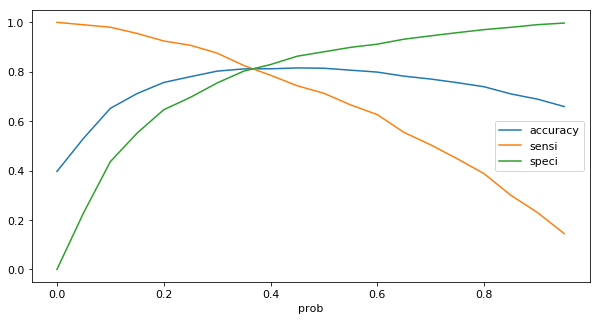

In [73]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot(kind = "line", x='prob', y=['accuracy','sensi','speci'], figsize=(10,5))
plt.show()

In [74]:
# From the above graph, we see that the optimal cut-off is at 0.35
y_test_pred_final['optimum_predictions'] = y_test_pred_final[0.35]
# In order to obtain a high conversion rate (80% or more) the minimum cut-off here needs to be moved up (to 0.5 in this case)
y_test_pred_final['high_conversion_predictions'] = y_test_pred_final[0.5]

y_test_pred_final = y_test_pred_final[['actuals', 'optimum_predictions', 'high_conversion_predictions', 'pred_prob']]

In [75]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.actuals, y_test_pred_final.high_conversion_predictions)

0.8142857142857143

In [76]:
print(classification_report(y_test_pred_final.actuals, y_test_pred_final.high_conversion_predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1394
           1       0.80      0.71      0.75       916

   micro avg       0.81      0.81      0.81      2310
   macro avg       0.81      0.80      0.80      2310
weighted avg       0.81      0.81      0.81      2310



#### We see that the accuracy of the model on the test set is 81%

In [77]:
# Confusion matrix
confusion_mat = metrics.confusion_matrix(y_test_pred_final.actuals, y_test_pred_final.high_conversion_predictions )
confusion_mat

array([[1228,  166],
       [ 263,  653]], dtype=int64)

In [78]:
TP = confusion_mat[1,1] # true positive 
TN = confusion_mat[0,0] # true negatives
FP = confusion_mat[0,1] # false positives
FN = confusion_mat[1,0] # false negatives

In [79]:
# Sensitivity
round(TP / (TP+FN),2)

0.71

We see that the sensitivity of the model on the test set is 71%

In [80]:
# Specificity
round(TN / float(TN+FP), 2)

0.88

We see that the specificity of the model on the test set is 88%

Accuracy: 81%

Sensitivity: 71%

Specificity: 88%

F1 score: 81%

Conversion Rate (Precision): 80%

### Lead Score

In [81]:
y_test_pred_final["Lead Score"] = round(y_test_pred_final["pred_prob"]*100,1)
y_test_pred_final["Lead Score"].reset_index().sort_values("Lead Score", ascending = False).head()

,Lead Number,Lead Score
363,591536,99.8
1330,604411,99.8
1516,588075,99.7
390,598055,99.7
232,624042,99.7
